In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
train_path="train"
class_names=os.listdir(train_path)

In [3]:
class_names=os.listdir(train_path)

['cloth', 'n95', 'n95v', 'nfm', 'srg']


In [4]:
test='test'
class_names1=os.listdir(test)

In [5]:
print(class_names1)

['cloth', 'n95', 'n95v', 'nfm', 'srg']


In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1956 files belonging to 5 classes.
Using 1565 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1956 files belonging to 5 classes.
Using 391 files for validation.


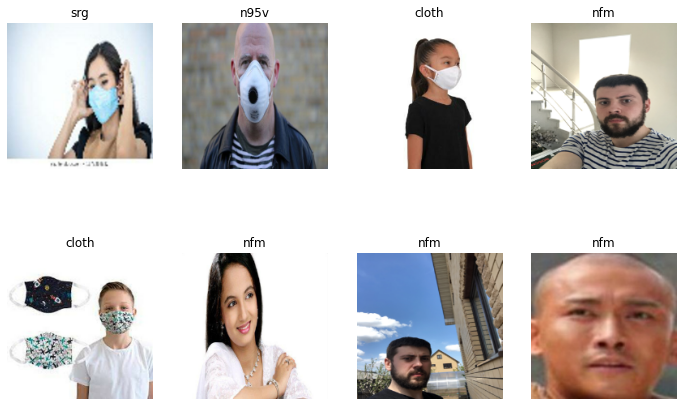

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(8):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
vgg_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

vgg_model.add(pretrained_model)

In [11]:
from keras.layers.core import Dense,Flatten

vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(5, activation='softmax'))

In [12]:
vgg_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dense_4 (Dense)             (None, 5)                 2

In [13]:
from tensorflow.keras.optimizers import Adam

vgg_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = vgg_model.fit(train_ds, validation_data=val_ds, epochs=2)

Epoch 1/2


C:\Users\Pratik\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


49/49 [==============================] - 128s 3s/step - loss: 1.4045 - accuracy: 0.5994 - val_loss: 0.6772 - val_accuracy: 0.7340
Epoch 2/2
49/49 [==============================] - 125s 3s/step - loss: 0.4689 - accuracy: 0.8332 - val_loss: 0.6335 - val_accuracy: 0.7826


In [14]:
import cv2
image=cv2.imread('0.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [16]:
pred=vgg_model.predict(image)
print(pred)

1/1 [==============================] - 0s 333ms/step
[[1.3594747e-01 9.4310261e-02 7.6673883e-01 2.9976196e-03 5.8736987e-06]]


In [17]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is n95v
